# CPDC — Análise Exploratória de Dados

Este notebook apresenta uma análise exploratória dos dados do Cartão de Pagamento da Defesa Civil (CPDC), com foco na compreensão da estrutura dos dados, qualidade das informações e padrões iniciais de gastos.

## Carregamento dos Dados

Os dados utilizados neste projeto são provenientes de fontes públicas e foram carregados para análise utilizando a biblioteca Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

df = pd.read_csv(
    r"C:\Users\borba\Documents\GitHub\CPDC\data\202505_CPDC.csv",
    encoding='latin-1',          # ou 'iso-8859-1' ou 'cp1252' — teste um por um
    sep=';',                     # mude para ',' se for vírgula mesmo
    decimal=',',                 # importante no Brasil
    dtype=str,                   # <--- ISSO AQUI! força tudo como texto → NUNCA remove zeros
    # on_bad_lines='skip'        # opcional: pula linhas ruins
)

print(df.head(10))               # veja se os zeros estão lá
print(df.dtypes)                 # confirme que as colunas são object (string)


  CÓDIGO ÓRGÃO SUPERIOR                         NOME ÓRGÃO SUPERIOR  \
0                 53000  Ministério da Integração e do Desenvolvime   
1                 53000  Ministério da Integração e do Desenvolvime   
2                 53000  Ministério da Integração e do Desenvolvime   
3                 53000  Ministério da Integração e do Desenvolvime   
4                 53000  Ministério da Integração e do Desenvolvime   
5                 53000  Ministério da Integração e do Desenvolvime   
6                 53000  Ministério da Integração e do Desenvolvime   
7                 53000  Ministério da Integração e do Desenvolvime   
8                 53000  Ministério da Integração e do Desenvolvime   
9                 53000  Ministério da Integração e do Desenvolvime   

  CÓDIGO ÓRGÃO                                         NOME ÓRGÃO  \
0        53000  Ministério da Integração e do Desenvolvimento ...   
1        53000  Ministério da Integração e do Desenvolvimento ...   
2        53

## Visão Geral do Dataset

Nesta etapa é feita uma inspeção inicial do conjunto de dados para entender sua dimensão, tipos de dados e estrutura geral.

In [2]:
df.head()
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   299 non-null    object
 1   NOME ÓRGÃO SUPERIOR     299 non-null    object
 2   CÓDIGO ÓRGÃO            299 non-null    object
 3   NOME ÓRGÃO              266 non-null    object
 4   CÓDIGO UNIDADE GESTORA  299 non-null    object
 5   NOME UNIDADE GESTORA    299 non-null    object
 6   ANO EXTRATO             299 non-null    object
 7   MÊS EXTRATO             299 non-null    object
 8   CPF PORTADOR            295 non-null    object
 9   NOME PORTADOR           299 non-null    object
 10  CNPJ OU CPF FAVORECIDO  299 non-null    object
 11  NOME FAVORECIDO         299 non-null    object
 12  EXECUTOR DESPESA        299 non-null    object
 13  NÚMERO CONVÊNIO         299 non-null    object
 14  CÓDIGO CONVENENTE       299 non-null    object
 15  NOME C

CÓDIGO ÓRGÃO SUPERIOR      0
NOME ÓRGÃO SUPERIOR        0
CÓDIGO ÓRGÃO               0
NOME ÓRGÃO                33
CÓDIGO UNIDADE GESTORA     0
NOME UNIDADE GESTORA       0
ANO EXTRATO                0
MÊS EXTRATO                0
CPF PORTADOR               4
NOME PORTADOR              0
CNPJ OU CPF FAVORECIDO     0
NOME FAVORECIDO            0
EXECUTOR DESPESA           0
NÚMERO CONVÊNIO            0
CÓDIGO CONVENENTE          0
NOME CONVENENTE            0
REPASSE                    0
TRANSAÇÃO                  0
DATA TRANSAÇÃO             0
VALOR TRANSAÇÃO            0
dtype: int64

## Análise inicial
- 299 registros (linhas)
- 20 variáveis (colunas)

Todas as colunas estão como object, inclusive:
- ANO EXTRATO
- MÊS EXTRATO
- DATA TRANSAÇÃO
- VALOR TRANSAÇÃO

Duas colunas chamam atenção:
- NOME ORGAO: 33 nulos
- CPF PORTADOR: 4 nulos

## Realizada Tipagem de Dados:

> df_raw   → dados brutos (intocados) |
df_clean → dados tratados (tipos, nulos, formatos)

Valores nulos: CPF PORTADOR E NOME ORGAO antes **nulo** trataremos como **NÃO INFORMADO**;
Convertemos: VALOR TRANSACAO de **object** para **float** além da virgulas e milhar; DATA TRANSACAO de **object** para **%d/%m/%Y** além de **coerce** por segurança; ANO e MES de **object** para **int**; 



In [3]:
df_raw = df.copy()
df_clean = df.copy()

In [4]:
df_clean['CPF PORTADOR'] = df_clean['CPF PORTADOR'].fillna('NÃO INFORMADO')

In [5]:
df_clean['NOME ÓRGÃO'] = df_clean['NOME ÓRGÃO'].fillna('NÃO INFORMADO')


In [6]:
df_clean['VALOR TRANSAÇÃO'] = (
    df_clean['VALOR TRANSAÇÃO']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [7]:
df_clean['DATA TRANSAÇÃO'] = pd.to_datetime(
    df_clean['DATA TRANSAÇÃO'],
    format='%d/%m/%Y',
    errors='coerce'
)


In [8]:
df_clean['ANO EXTRATO'] = df_clean['ANO EXTRATO'].astype(int)


In [9]:
df_clean['MÊS EXTRATO'] = df_clean['MÊS EXTRATO'].astype(int)


## Valores Ausentes

A verificação de valores ausentes é fundamental para identificar possíveis problemas de qualidade nos dados.

In [10]:
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CÓDIGO ÓRGÃO SUPERIOR   299 non-null    object        
 1   NOME ÓRGÃO SUPERIOR     299 non-null    object        
 2   CÓDIGO ÓRGÃO            299 non-null    object        
 3   NOME ÓRGÃO              299 non-null    object        
 4   CÓDIGO UNIDADE GESTORA  299 non-null    object        
 5   NOME UNIDADE GESTORA    299 non-null    object        
 6   ANO EXTRATO             299 non-null    int64         
 7   MÊS EXTRATO             299 non-null    int64         
 8   CPF PORTADOR            299 non-null    object        
 9   NOME PORTADOR           299 non-null    object        
 10  CNPJ OU CPF FAVORECIDO  299 non-null    object        
 11  NOME FAVORECIDO         299 non-null    object        
 12  EXECUTOR DESPESA        299 non-null    object    

CÓDIGO ÓRGÃO SUPERIOR     0
NOME ÓRGÃO SUPERIOR       0
CÓDIGO ÓRGÃO              0
NOME ÓRGÃO                0
CÓDIGO UNIDADE GESTORA    0
NOME UNIDADE GESTORA      0
ANO EXTRATO               0
MÊS EXTRATO               0
CPF PORTADOR              0
NOME PORTADOR             0
CNPJ OU CPF FAVORECIDO    0
NOME FAVORECIDO           0
EXECUTOR DESPESA          0
NÚMERO CONVÊNIO           0
CÓDIGO CONVENENTE         0
NOME CONVENENTE           0
REPASSE                   0
TRANSAÇÃO                 0
DATA TRANSAÇÃO            0
VALOR TRANSAÇÃO           0
dtype: int64

## Análise Exploratória de Dados

Nesta seção são realizadas análises univariadas e bivariadas com o objetivo de identificar padrões e comportamentos relevantes nos dados.

In [11]:
freq_orgao = (
    df_clean['NOME ÓRGÃO SUPERIOR']
    .value_counts()
    .head(10)
)


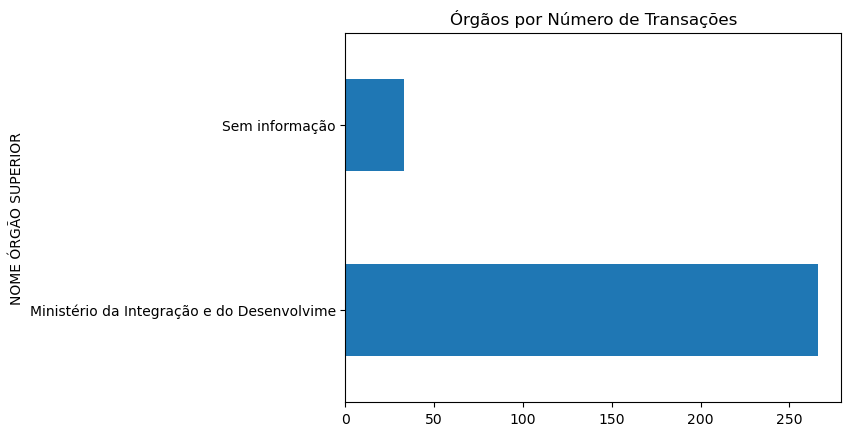

In [27]:
freq_orgao.plot(kind='barh', title='Órgãos por Número de Transações')

plt.savefig(
    "../results/figures/numerotransacoes.png",
    dpi=300,
    bbox_inches="tight"
)


Podemos ver que o **MID** concentra o maior número de transações.

In [13]:
freq_portador = (
    df_clean['NOME PORTADOR']
    .value_counts()
    .head(10)
)


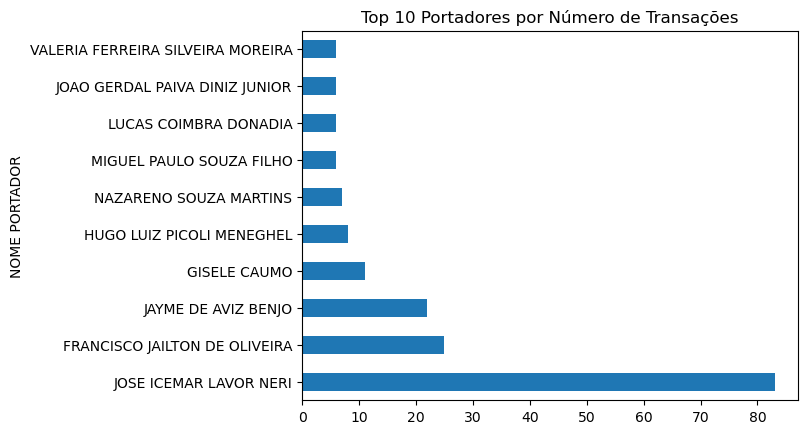

In [26]:
freq_portador.plot(kind='barh', title='Top 10 Portadores por Número de Transações')

plt.savefig(
    "../results/figures/top10transacoes.png",
    dpi=300,
    bbox_inches="tight"
)


Quem mais **usou** o cartão, não necessariamente quem mais **gastou**

In [15]:
gasto_favorecido = (
    df_clean
    .groupby('NOME FAVORECIDO')['VALOR TRANSAÇÃO']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


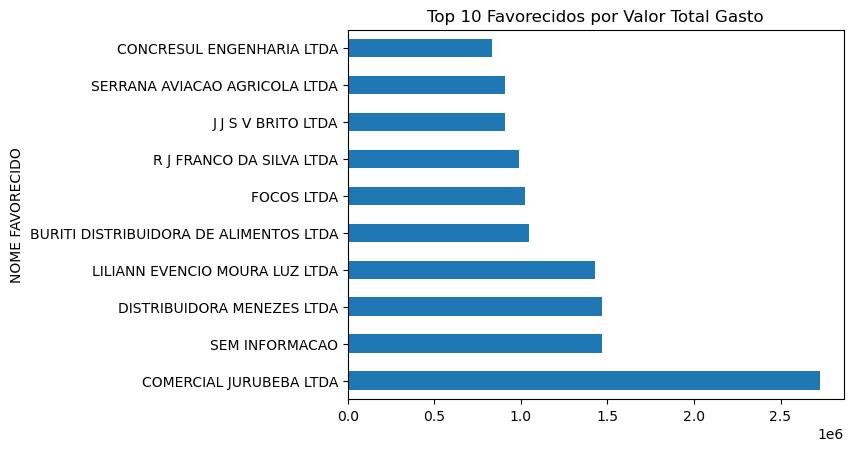

In [25]:
gasto_favorecido.plot(kind='barh', title='Top 10 Favorecidos por Valor Total Gasto')

plt.savefig(
    "../results/figures/top10favorecidos.png",
    dpi=300,
    bbox_inches="tight"
)


Vemos gastos com bebidas, mercados, alimentos e construtoras

In [17]:
gasto_portador = (
    df_clean
    .groupby('NOME PORTADOR')['VALOR TRANSAÇÃO']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


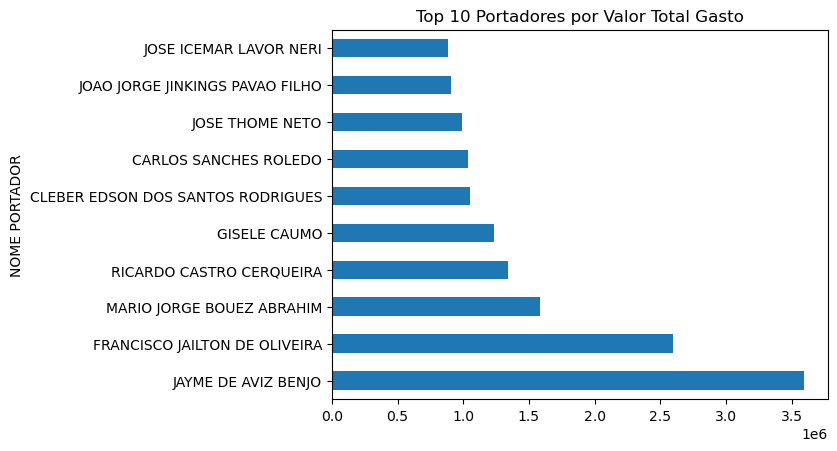

In [24]:
gasto_portador.plot(
    kind='barh',
    title='Top 10 Portadores por Valor Total Gasto'
)

plt.savefig(
    "../results/figures/top10portadores.png",
    dpi=300,
    bbox_inches="tight"
)

Alguns portadores concentram valores elevados mesmo com menor número de transações

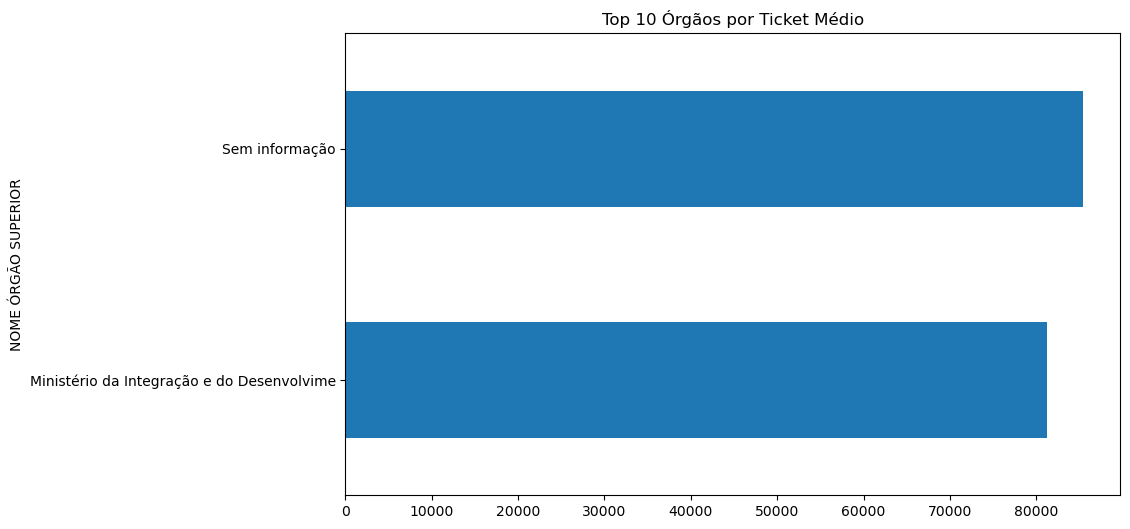

In [19]:
ticket_medio_orgao = (
    df_clean
    .groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

ticket_medio_orgao.sort_values().plot(kind='barh', figsize=(10,6))

plt.title("Top 10 Órgãos por Ticket Médio")

plt.savefig(
    "../results/figures/top10orgaos.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


Infelizmente não temos a informação do nome do orgão, e mesmo com menos transações podem apresentar ticket médio significativamente maior.

## Salvamento do Dataset Processado

In [23]:
df.to_csv("../data/processed/cpdc_processed.csv", index=False)

## CONCLUSÃO

Após a etapa de limpeza e tipagem dos dados, foi possível realizar análises univariadas e bivariadas sobre os gastos com o Cartão de Pagamento da Defesa Civil (CPDC). Observou-se que o MID concentra o maior número de transações registradas no período analisado, indicando maior frequência de uso do cartão por esse órgão.

A análise dos favorecidos revelou que os gastos estão majoritariamente concentrados em estabelecimentos relacionados a bebidas, mercados, alimentos e construtoras, o que sugere despesas operacionais e logísticas típicas de ações emergenciais.

Durante o processo, foi identificada a ausência de informações completas sobre o nome de alguns órgãos, o que limita análises mais detalhadas por entidade administrativa. Ainda assim, foi possível observar que órgãos ou portadores com menor número de transações podem apresentar valores médios significativamente mais altos, evidenciando diferenças relevantes no padrão de gasto.

De forma geral, a análise demonstra que frequência de uso não está necessariamente associada a maior volume financeiro, reforçando a importância de avaliar simultaneamente quantidade de transações, valor total e ticket médio para uma compreensão mais precisa dos gastos públicos.